# Numerical solutions for the classic harmonic oscillator

The classic harmonic oscillator is a system that oscillates around an equilibrium position with sinusoidal motion. A practical example is a mass attached on a horizontal spring. when the mass is moved the spring exert a restoring force

$ F = -kx $

where $x$ is the displacement while $k$ is a constant that depends on the rigidity of the spring (this is true only when the displacement is little enough that the spring stays in linear regime). With the hypothesis of little displacement and posing $\omega = \sqrt{\frac{k}{m}} $ the equation of motion

$m\dot x=-kx$

has the solution

$x(t)=A\cos(\omega t + \phi)$,

where A is the amplitude of the oscillation and $\phi$ is the phase, variables that are settled once the initial conditions are given. For example, if the initial conditions are $x(0)=1$ and $\dot x(0)= 0$ the solution is

$x(t)=\cos(\omega t) $.

In general, given $x(0)=x_0$ and $\dot x(0)=\dot x_0$ to settle $A$ and $\phi$ the following system must be solved

$ \begin{cases} A\cos(\phi)=x_0 \\ -2\pi A\sin(\phi)=\dot x_0 \end{cases} $.

For $x_0 \neq 0$ the solutions are 

$\begin{cases}  A=\frac{x_0}{\cos(\phi)  \\  \phi=\arctan(-\frac{v_0}{2\pi x_0})} \end{cases}$ 

while for $x_0=0$ there are two possible solutions

$\begin{cases} \phi=\frac{\pi}{2} \\ A=-\frac{v_0}{2\pi} \end{cases} \lor \begin{cases} \phi=\frac{3\pi}{2} \\ A=\frac{v_0}{2\pi} \end{cases} $,

where an analogous reasoning in the case $v_0= 0$ could have been made.

The following code gives an interactive plot that displays the harmonic oscillator solution where $\omega=2\pi$, so that an oscillation occurs in a time unit. The initial conditions and the distance between the computed points and the total time can be chose interactively. If $x_0=0$ is chosen the solution $\begin{cases} \phi=\frac{\pi}{2} \\ A=-\frac{v_0}{2\pi} \end{cases} $ is considered. Also the energy of the system is plotted, showing that is a constant of motion, where taking the mass of the oscillator $m = 1$ ans using the relation between $k$ and $m$ the following formula for the energy is obtained

$E = \frac{1}{2}(v^2+w^2 k^2)$.

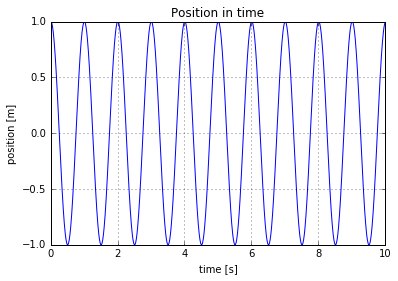

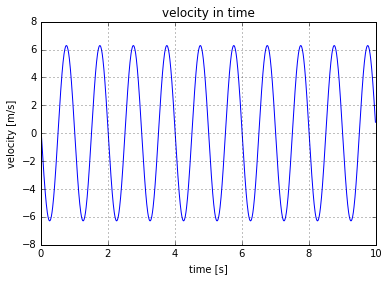

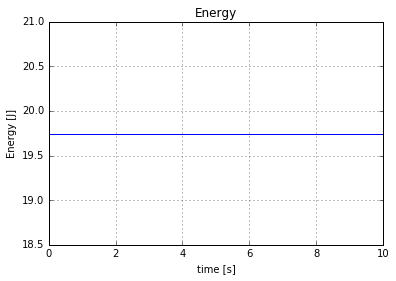

In [1]:
from matplotlib.pyplot import *      #Import all methods of matplotlib.pyplot library
from math import *                   #import all methods of numpy math
from ipywidgets import interact      #Import library for interacting widgets
#tell python to show the plot inside the notebook
%matplotlib inline


def exact_solution(xi=1, vi=0, h=0.01, t_max=3):

    k = h
    t = [0]
    x = [0]
    v = [0]
    
    x[0] = xi
    v[0] = vi
    E = [0.5*(pow(v[0], 2)+pow(2*pi*x[0], 2))]
    if xi == 0:
        phi = pi/2
        A= -vi/(2*pi)
    else:
        phi = atan(-vi/(2*pi*xi))
        A = xi/cos(phi)
    
    for i in range(1, floor(t_max/h)):

        x.append(A*cos(2*pi*t[i-1]+phi))
        v.append(-A*2*pi*sin(2*pi*t[i-1]+phi))
        E.append(0.5*(pow(v[i], 2)+pow(2*pi*x[i], 2)))

        t.append(k)
        k += h

        
    figure()
    plot(t, x)
    title('Position in time')
    xlabel('time [s]')
    ylabel('position [m]')
    grid()

    figure()
    plot(t, v)
    title('velocity in time')
    xlabel('time [s]')
    ylabel('velocity [m/s]')
    grid()

    figure()
    plot(t, E)
    title('Energy')
    xlabel('time [s]')
    ylabel('Energy [J]')
    grid()
    
    show()

interact(exact_solution, xi = (-10, 10, 0.1) , vi = (-10, 10, 0.1), h = (0.00001, 1, 0.00001), t_max = (1, 10, 0.1))



As can be studied in any book on computational methods, the simplest of the approximated methods for solving a differential equation is the Euler methods (named after the great Swiss mathematician, physicist, astronomer, logician and engineer).
It consist in simply approximate the infinitesimal increment $dx$ with a finite one $h$, them starting with the initial value the subsequent value are computed and so on. For a first order differential equation with initial value of the form

$y'(t)=f(t,y(t)),  y(t_0)=y_0$

the methods lead us to

$y_n=y_{n-1}+h(f(t_{n-1},y_{n-1}))$.

Since a differential equation of any order may be represented with a system of first order differential equations, this methods easily applies to all cases, in particular for the harmonic oscillator the following formula are obtained

$\begin{cases} x_n=x_{n-1}+h*v_{n-1}  \\ v_n=v_{n-1}-\omega^2 h x_{n-1})  \end{cases}$.

Two kind of error must be taken under control. The one in the approximation with a finite increment, which is proportional to $h$. The other is a cumulative error that propagates while the element are computed. An interactive example will clarify the problem!

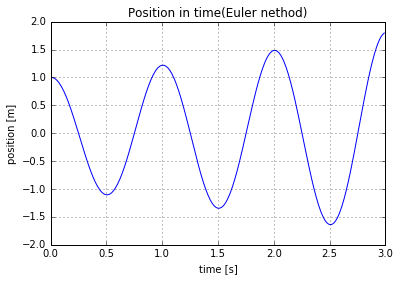

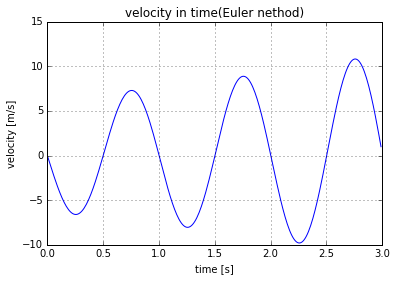

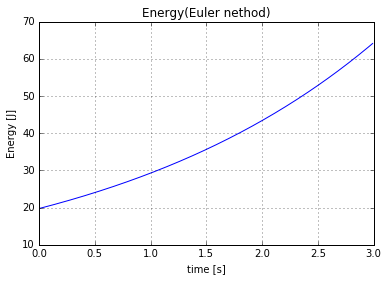

<function __main__.exact_solution>

In [15]:
from matplotlib.pyplot import *      #Import all methods of matplotlib.pyplot library
from math import *                   #import all methods of numpy math
from ipywidgets import interact      #Import library for interacting widgets
#tell python to show the plot inside the notebook
%matplotlib inline


def Euler_solution(xi=1, vi=0, h=0.01, t_max=3):

    k = h
    t = [0]
    xE = [0]
    vE = [0]
    
    xE[0] = xi
    vE[0] = vi
    EE = [0.5*(pow(vE[0], 2)+pow(2*pi*xE[0], 2))]
    
    
    for i in range(1, floor(t_max/h)):

        t.append(k)
        k += h

        xE.append(xE[i-1]+h*vE[i-1])
        vE.append(vE[i-1]-pow(2*pi, 2)*h*xE[i-1])
        EE.append(0.5*(pow(vE[i], 2)+pow(2*pi*xE[i], 2)))
        
    figure()
    plot(t, xE)
    title('Position in time(Euler nethod)')
    xlabel('time [s]')
    ylabel('position [m]')
    grid()

    figure()
    plot(t, vE)
    title('velocity in time(Euler nethod)')
    xlabel('time [s]')
    ylabel('velocity [m/s]')
    grid()

    figure()
    plot(t, EE)
    title('Energy(Euler nethod)')
    xlabel('time [s]')
    ylabel('Energy [J]')
    grid()
    
    show()

interact(Euler_solution, xi = (-10, 10, 0.1) , vi = (-10, 10, 0.1), h = (0.00001, 1, 0.00001), t_max = (1, 10, 0.1))

The oscillations keep a constant period, but became bigger and bigger. If $h$ is "little enough" the energy seems to increase linearly, but as soon $h$ is "too big" it increases exponentially. Anyway, this methods does not preserve energy and gives good results only for short period of times, since the errors in the computing of an element propagates in the computing of the subsequent.
A more sophisticated algorithm is the "velocity Verlet". Given an equation of motion in the form $\vec{F}=m\vec{a}(t)$ where the acceleration $\vec{a}(t)$ depends only on the position $x(t)$, and given the initial values, the subsequent values at $t+\Delta t$ are computed using an acceleration (force divided by the mass) that is the average of the force acting in the interval $\Delta t$. In formula

$ \begin{cases} \vec{x}(t+\Delta t)=\vec{x}(t)+\vec{v}\Delta t+\frac{1}{2}\vec{a}(t)\Delta t^2 \\ 
\vec{v}(t+\Delta t)=\vec{v}(t)+\frac{\vec{a}(t)+\vec{a}(t+\Delta t)}{2}*\Delta t  \end{cases}  $

This algorithm has the propriety to be time reversible, in other words if the solution is computed backward the same results are obtained. This means that the system preserves energy on long periods of time, an example will make this clear.

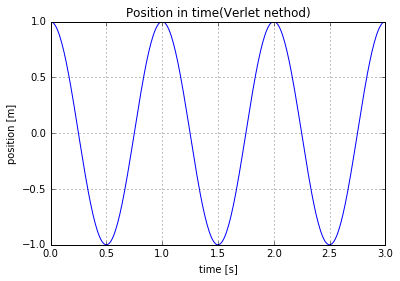

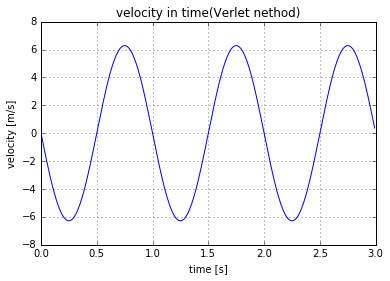

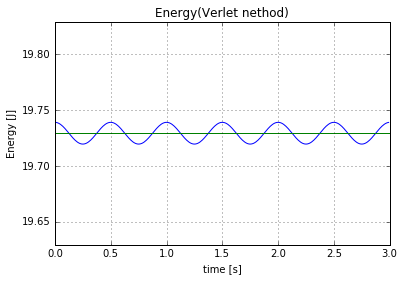

<function __main__.Verlet_solution>

In [1]:
from matplotlib.pyplot import *      #Import all methods of matplotlib.pyplot library
from math import *                   #import all methods of numpy math
from numpy import mean               #import the mean methods of the python library
from ipywidgets import interact      #Import library for interacting widgets
#tell python to show the plot inside the notebook
%matplotlib inline


def Verlet_solution(xi=1, vi=0, h=0.01, t_max=3):

    k = h
    t = [0]
    xV = [0]
    vV = [0]
    
    xV[0] = xi
    vV[0] = vi
    EV = [0.5*(pow(vV[0], 2)+pow(2*pi*xV[0], 2))]

    
    
    for i in range(1, floor(t_max/h)):

        t.append(k)
        k += h

        xV.append(xV[i-1]+vV[i-1]*h-2*pow(h*pi, 2)*xV[i-1])
        vV.append(vV[i-1]-2*h*pow(pi, 2)*(xV[i-1]+xV[i]))
        EV.append(0.5*(pow(vV[i], 2)+pow(2*pi*xV[i], 2)))
        
    EM=[mean(EV)]
    
    for i in range(1, floor(t_max/h)):
        
        EM.append(EM[0])
        
    figure()
    plot(t, xV)
    title('Position in time(Verlet nethod)')
    xlabel('time [s]')
    ylabel('position [m]')
    grid()

    figure()
    plot(t, vV)
    title('velocity in time(Verlet nethod)')
    xlabel('time [s]')
    ylabel('velocity [m/s]')
    grid()

    figure()
    plot(t, EV, t, EM)
    title('Energy(Verlet nethod)')
    xlabel('time [s]')
    ylabel('Energy [J]')
    grid()
    ylim(EM[0]-0.1 , EM[0]+0.1)
    
    show()
    

interact(Verlet_solution, xi = (-10, 10, 0.1) , vi = (-10, 10, 0.1), h = (0.00001, 1, 0.00001), t_max = (1, 10, 0.1))

In the last plot are represented the computed energy for any time step and the mean values of the energy.As can be seen, the energy oscillates around the exact values for the energy. This time the solutions is a good approximation of the harmonic oscillator also for long times.